<a href="https://colab.research.google.com/github/ByronTraconis/Working/blob/main/Steam_Reviews_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steam Reviews Dataset

### Descricpión del proyecto

Para este proyecto tenemos un dataset, el cual se describirá acontinuación:


<ul>
    <li><code>steam_reviews.csv</code>: Estos datos contienen reseñas de los juegos más vendidos de Steam a fecha de febrero de 2019.</li>

</ul>

## **Cargar liberías**

En primera instancia instalamos las librerías necesarias para la correcta ejecución del programa. Posteriormente, las cargamos en el ambiente.

In [1]:
pip install eli5

In [2]:
#Librerias
from wordcloud import WordCloud, STOPWORDS
import eli5
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from time import time
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [3]:
#Para ignorar las amenazas

# import warnings filter
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

## **Limpieza y exploración de los datos**

- Lo primero que vamos a hacer es cargar nuestros datos en la variable **steam_data**. 


In [4]:
#Asignación de los datos a la variable.
steam_data = pd.read_csv("https://www.dl.dropboxusercontent.com/s/lp7f9h74ebwnf97/steam_reviews.csv?dl=0")

steam_data_copy = pd.read_csv("https://www.dl.dropboxusercontent.com/s/lp7f9h74ebwnf97/steam_reviews.csv?dl=0")

In [5]:
#Imprimir el número total de juegos
print("El número total de juegos reseñados en el dataset es de:", len(steam_data["title"].unique()))

#Imprimir cuales son esos juegos
juegos = steam_data["title"].unique()
dic_juegos = {"Titulos": juegos}
data_set= pd.DataFrame(dic_juegos)
data_set.head(len(steam_data["title"].unique()))

El número total de juegos reseñados en el dataset es de: 48


,Titulos
0,Expansion - Hearts of Iron IV: Man the Guns
1,Dead by Daylight
2,Wargroove
3,Wallpaper Engine
4,Factorio
5,Insurgency: Sandstorm
6,Cold Waters
7,Tannenberg
8,Pathfinder: Kingmaker
9,MONSTER HUNTER: WORLD


In [6]:
#Observamos nuestro conjunto de datos
steam_data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


## **Descipción de nuestros datos**


Realizamos un análisis de la estructura de la tabla, esto con el fin de observar que tipo de variables tenemos.

- Realizamos una observación de las dimensiones de nuestro DataSet.
- Observamos los datos  de nuestro DataSet.

In [7]:
#Observamos las dimensiones de nuestro dataSet
print("Las dimensiones de nuestro DataSet tienen : " + str(steam_data.shape[0]) + " filas y " + str(steam_data.shape[1]) + " columnas.")

Las dimensiones de nuestro DataSet tienen : 434891 filas y 8 columnas.


In [8]:
#Observamos un poco más a detalle que datos posee nuestro DataSet
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


Podemos observar que en nuestro conjunto de datos, **3** de estos son **Enteros**, **4** de los datos son de tipos **Cadena** y el dato restante es **Booleano**

Con respecto a lo anterior, sabemos que cada uno de estos tipos de datos corresponde a:


- **date_posted:** La fecha de publicación de una reseña.

- **funny:** Cuántos otros jugadores piensan que la crítica es divertida.

- **helpful:** Cuántos otros jugadores piensan que la revisión es útil.

- **hour_played:** Cuántas horas juega un crítico al juego antes de hacer una crítica.

- **is_early_access_review:** Indica si los jugaores tuvieron acceso anticipado al juego.

- **recommendation:** Si el crítico recomienda el juego o no.

- **review:** El texto de la revisión del usuario.

- **title:** El título del juego que se está revisando.


## **Estadísticas del DataFrame**


In [9]:
#Sacar las los juegos
categorias = steam_data.groupby("title")["title"].unique()

#Sacar el número de reseñas por juego
reviews= steam_data.groupby("title").agg({'review': 'count'})

#Renombrar 

In [10]:
reviews.head(len(steam_data["title"].unique()))

,review
title,
ACE COMBAT™ 7: SKIES UNKNOWN,10
ARK: Survival Evolved,194
ASTRONEER,2658
Battlefleet Gothic: Armada 2,10
Beat Saber,10
Cold Waters,10
Dead by Daylight,22178
Divinity: Original Sin 2 - Definitive Edition,190
Don't Starve Together,165


In [11]:
steam_data.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


Observamos datos estadísticos importantes como son la:



* **Media**
*   **Desviación estándar**
*   **El máximo**
*   **El mínimo**
*   **Los cuartiles**

Con esto podemos saber un poco más acerca del conjunto de datos para que en las proximas celdas de código podamos interpretarlo.

In [12]:
#Agreamos una nueva columna para saber la extensión de cada una de las reseñas
steam_data['review_length'] = steam_data.apply(lambda row: len(str(row['review'])), axis=1)

In [13]:
#Agregamos una nueva columna para poder identificar mediante un valor booleano si la reseña es recomendada o no 
# 1 para las recomendadas y 0 para las no recomendadas


steam_data['recommendation_int'] = steam_data['recommendation'] == 'Recommended'
steam_data['recommendation_int'] = steam_data['recommendation_int'].astype(int)

steam_data_copy['recommendation_int'] = steam_data_copy['recommendation'] == 'Recommended'
steam_data_copy['recommendation_int'] = steam_data_copy['recommendation_int'].astype(int)

In [14]:
#Verificamos que los cambios se hayan hecho
steam_data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_length,recommendation_int
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,195,1
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,4,1
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,171,1
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1397,1


Podemos observar que en nuestra cabecera del conjunto de datos se agregaron las columnas para poder observar la extensión de las letras de cada una de las reseñas, esto con el fin de hacer más fácil y comprensible la interpretación de los datos.

# **Exploración por medio de gráficos.**

Ahora, procederemos a hacer una comparación gráfica de las reseñas recomendadas contra las no recomendadas, esto nos ayudará a dimensionar los datos de las reseñas, esto para explorarlas más fondo en las líneas de código posteriores.

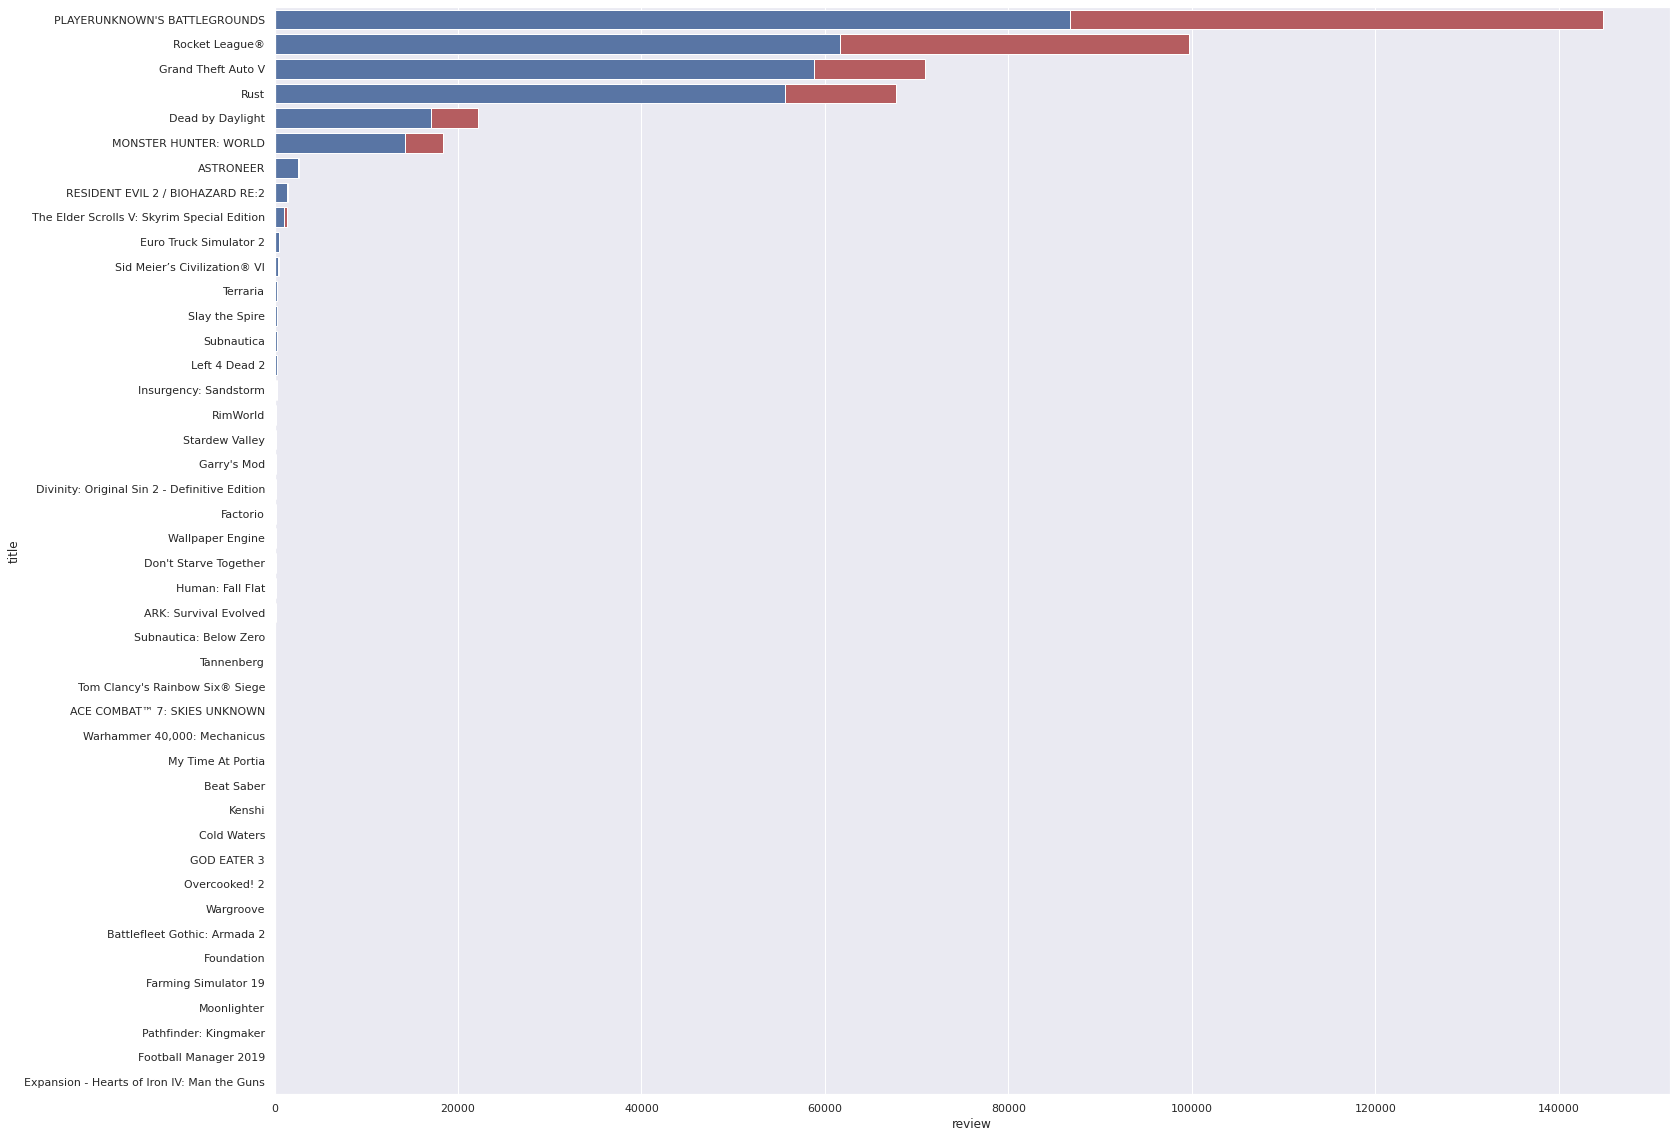

In [15]:
#Creamos una variable que almacene la suma de las reseñas agrupadas por el título de cada juego
reviews_count = steam_data.groupby(['title'])['review'].count().sort_values(ascending=False)

#Se le asigna un index
reviews_count = reviews_count.reset_index()


#Construcción del gráfico
sns.set(style="darkgrid")
plt.figure(figsize=(25,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = steam_data.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")

plt.show()

Aclarando que para algunos juegos no es posible observar el contraste de las personas que recomiendan y no recomiendan el juego. Esto se debe principalmente a la escala en la que está la gráfica, ya que algunos juegos tienen demasiadas reseñas y otros no tantas, por lo que no se pueden observar a simple vista.

Aclarando lo que se dice en la parte de arriba, en la siguiente línea de código se muestra una tabla con el número de reseñas por juego.

In [16]:
reviews_count.head(48)

,title,review
0,PLAYERUNKNOWN'S BATTLEGROUNDS,144846
1,Grand Theft Auto V,99677
2,Rust,70907
3,Rocket League®,67765
4,Dead by Daylight,22178
5,MONSTER HUNTER: WORLD,18390
6,ASTRONEER,2658
7,The Elder Scrolls V: Skyrim Special Edition,1471
8,RESIDENT EVIL 2 / BIOHAZARD RE:2,1384
9,Sid Meier’s Civilization® VI,522


Al observar la tabla de arriba podemos confirmar lo que deciamos anteriormente, hay un contraste demasiado grande con respecto al número de reseñas.

En el puesto número 1 tenemos al juego **PLAYERUNKNOWN'S BATTLEGROUNDS** con **144846** reseñas.

En el puesto número 47 tenemos al juego **Sid Meier's Civilization® VI: Gathering Storm** con **3** reseñas.

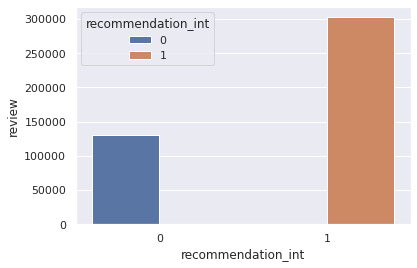

In [17]:
#Ahora observaremos de una manera general los datos de los juegos recomendados contra los no recomendados

#Procedemos a agrupar los datos por medio de la clasificación booleana que realizamos en líneas anteriores de código

contrast_reviews = steam_data.groupby(['recommendation_int']).count()
contrast_reviews = contrast_reviews.reset_index()


ax = sns.barplot(x=contrast_reviews['recommendation_int'], y=contrast_reviews['review'],
            data=contrast_reviews, hue='recommendation_int')

Claramente se puede ver un índice de personas que recomiendan el juego,independientemente de si sus reseñas son positivas o negativas(eso se analizará a detalle más adelante).

In [18]:
contrast_reviews = steam_data[steam_data['helpful'] > 50]

contrast_reviews

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_length,recommendation_int
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1397,1
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight,4836,1
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight,72,1
...,...,...,...,...,...,...,...,...,...,...
434773,2017-06-13,4,179,17,False,Recommended,Wonderfull fun little puzzle game the game is ...,Human: Fall Flat,253,1
434881,2019-02-01,5,210,15,False,Recommended,On paper an indie game made by a lesser known ...,"Warhammer 40,000: Mechanicus",5684,1
434882,2018-11-16,46,174,13,False,Recommended,Man AdMech. I'd wanted them to get a proper ar...,"Warhammer 40,000: Mechanicus",2677,1
434883,2018-11-20,11,199,15,False,Recommended,I am sad that Total Biscuit isn't around anymo...,"Warhammer 40,000: Mechanicus",1295,1


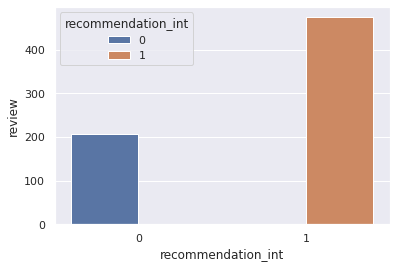

In [19]:
#Ahora se realizará un análisis de las recomendaciones, pero ahora con la única diferencia de que los resultados se están filtrando por medio
#del tipo de dato "helpful", que indica si a algún jugador le resultó últil la reseña observada

contrast_reviews = steam_data[steam_data['helpful'] > 50].groupby(['recommendation_int']).count()
contrast_reviews = contrast_reviews.reset_index()


ax = sns.barplot(x=contrast_reviews['recommendation_int'], y=contrast_reviews['review'],
            data=contrast_reviews, hue='recommendation_int')

Aquí al poner el filtro anterior, podemos observar una varianza con respecto a la primera gráfica. La disminución de reseñas recomendadas y no recomendadas nos da un indricador de reseñas más útiles ya que estamos filtrando por lo que se le hizo más útil al usuario.

# **Clasificación por medio de T-sne**

In [20]:
#Ahora vamos a agrupar los datos cercanos y separar los datos diferentes por medio de TSNE.

#Quitamos los datos no númericos del dataset
no_numeri = ["date_posted", "review", "title","is_early_access_review","recommendation"]

set_numerico = steam_data_copy[steam_data_copy['title'] == "Dead by Daylight"].drop(no_numeri, axis=1)

print("Las dimensiones de nuestro DataSet tienen : " + str(set_numerico.shape[0]) + " filas y " + str(set_numerico.shape[1]) + " columnas.")

Las dimensiones de nuestro DataSet tienen : 22221 filas y 4 columnas.


In [21]:
set_numerico.head()

,funny,helpful,hour_played,recommendation_int
3,126,1086,676,1
4,85,2139,612,1
5,4,55,2694,1
6,12,228,48,1
7,295,219,71,1


In [22]:
#Procedemos a crear un modelo t-SNE con un aprendizaje de 50

m = TSNE(learning_rate = 50)

# Ajuste y transformación del modelo t-SNE en el conjunto de datos numéricos
tsne_features = m.fit_transform(set_numerico)

#print(tsne_features.shape)
print("Después del TSNE las dimensiones de nuestro DataSet tienen : " + str(tsne_features.shape[0]) + " filas y " + str(tsne_features.shape[1]) + " columnas.")

Después del TSNE las dimensiones de nuestro DataSet tienen : 22221 filas y 2 columnas.


In [23]:
#Verificamos como quedaron las dos columnas restantes

#print(tsne_features[:, 0 ]) #<---- Para las X
#print(tsne_features[:, 1 ]) #<---- Para las Y

In [24]:
#Asignamos las columnas resultantes del proceso anterior a las variables X y Y

x = tsne_features[:, 0 ]
y = tsne_features[:, 1 ]

steam_data_cop = steam_data_copy[steam_data_copy['title'] == "Dead by Daylight"]
#Le agregamos las dos columnas a nuestro DatSet

steam_data_cop["x"] = x

steam_data_cop["y"] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
#verificamos que se hayan agregado
steam_data_cop.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,recommendation_int,x,y
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,1,9.755263,-8.944527
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1,9.728438,-8.887657
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight,1,-26.046480,-0.719840
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,1,10.467120,-9.739201
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight,1,9.991814,-9.380809


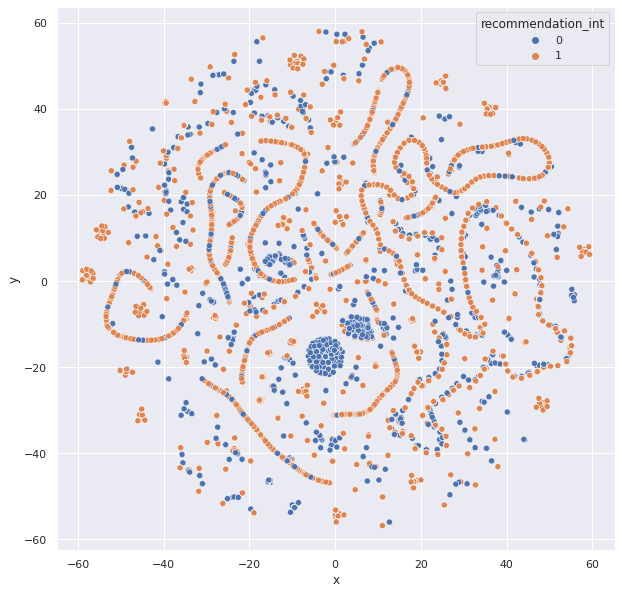

In [26]:
#Ahora si, procedemos a verificar nuestros datos de manera visual

#Construimos un scatterplot
fig = plt.figure(figsize =(10,10))
sns.scatterplot(x="x", y="y", hue='recommendation_int', data=steam_data_cop)

plt.show()

#**Construcción de un modelo**

In [27]:
#Vamos a preparar los datos para la construcción de un modelo con la librería de sklearn

clean_data = steam_data.dropna()

In [28]:
train = clean_data

In [29]:
#Realizamos el modelo por medio de sklearn

#Escogemos la variable X
X = train['review']

#Procedemos a escoger la variable predictora
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

# **Procesamiento del Lenguaje Natural**

In [30]:
# Vamos a utilizar la libreria spaCy para el procesamiento de lenguaje natural

#cargamos el modelo de idioma inglés 
nlp = spacy.load('en', disable=['parser', 'ner'])

spacy_tokenizer = nlp.tokenizer

# creamos un tokenizador personalizado usando el pipeline de procesamiento de documentos spaCy
def custom_tokenizer(document):
    doc_spacy = nlp(document)
    return [token.lemma_ for token in doc_spacy]

# Prueba de procesamiento

In [31]:
#Muestra de las reseñas

sample = steam_data[steam_data['title'] == "Dead by Daylight"]["review"][9]

sample

'if you think cs go is toxic try this game'

In [32]:
#Cargamos el modelo de idioma inglés
nlp = spacy.load('en')

#Llamamos al objeto nlp en nuestro texto de muestra
doc = nlp(sample)

In [33]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 70})

In [34]:
#Muestra de las reseñas para otro ejemplo

sample_ent = steam_data[steam_data['title'] == "Dead by Daylight"]["review"][15]

sample_ent

'I hope that one day all ppl who played it would be killed irl'

**Traducción:** Espero que un día todas las personas que lo jugaron sean asesinadas en la vida real.

In [58]:
steam_data[steam_data['title'] == "Dead by Daylight"].head(16)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_length,recommendation_int
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1397,1
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight,4836,1
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094,1
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight,72,1
8,2018-09-21,2,54,400,False,Recommended,Any longtime Dead by Daylight player knows tha...,Dead by Daylight,1830,1
9,2018-12-05,380,271,414,False,Recommended,if you think cs go is toxic try this game,Dead by Daylight,41,1
10,2018-12-04,11,106,900,False,Recommended,This is simultaneously the most fun and most i...,Dead by Daylight,1795,1
11,2018-01-16,88,614,1878,False,Recommended,Kids Everyone Casual players Pro players Graph...,Dead by Daylight,1917,1
12,2018-12-10,286,123,725,False,Recommended,Death is not an escape but disconnecting is,Dead by Daylight,43,1


In [35]:
#Cargamos el modelo de idioma inglés
nlp_e = spacy.load('en')

#Llamamos al objeto nlp en nuestro texto de muestra
doc_e = nlp(sample_ent)

In [36]:
displacy.render(doc_e, style="ent", jupyter=True)

# Construcción de clasificadores

In [37]:
#Se van a construir para determinar las opiniones de la gente, si es positiva y negativa


#Vectorizadores dentro de un pipline
t0 = time()
text_clf = Pipeline([('vect', TfidfVectorizer(max_df=0.99, norm='l2')), # por defecto corta algunas palabras genéricas
                     ('clf', LogisticRegression(solver='saga', fit_intercept=True, class_weight='balanced', C=0.1)) 
                    ])

print("preprocesamiento hecho en %0.3fs." % (time() - t0))


t0 = time()
text_clf.fit(X_train, y_train)
print("ajuste realizado en %0.3fs." % (time() - t0))

t0 = time()
y_pred = text_clf.predict(X_test)
print("predicción hecha en %0.3fs." % (time() - t0))
print(classification_report(y_test, y_pred))

preprocesamiento hecho en 0.000s.
ajuste realizado en 23.245s.
predicción hecha en 4.214s.
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     39187
           1       0.93      0.86      0.89     90826

    accuracy                           0.85    130013
   macro avg       0.82      0.85      0.83    130013
weighted avg       0.86      0.85      0.86    130013



In [38]:
#Aqui se pueden observar los coeficientes de la regresión logistica atribuidos a los tokens
#Se observan las palabras representativas de todas las reseñas, si estas palabras son buenas o no

eli5.show_weights(text_clf, vec=text_clf.named_steps["vect"], top=40)

Weight?,Feature
+7.098,best
+6.247,amazing
+6.098,great
+5.546,awesome
+5.185,love
+5.036,good
+5.001,fun
+3.666,10
+3.573,nice
+3.216,perfect


En el gráfico que se muestra en la parte de arriba, podemos observar que tenemos los pesos o coeficientes. Entre más alto sea este número, es más probable que la persona haya recomendado el juego

# **Wordcloud**

In [47]:
#Para las reseñas negativas

clean_data = steam_data.dropna()

#Para las reseñas no recomendadas
train = clean_data[(clean_data['title'] == 'Dead by Daylight') & (clean_data['recommendation_int'] == 0)]

X = train['review']
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

Por los motivos mostrados en la imagen, nos vemos obligados a realizar las wordclouds de las reseñas tomando unicamente en cuenta a un juego.



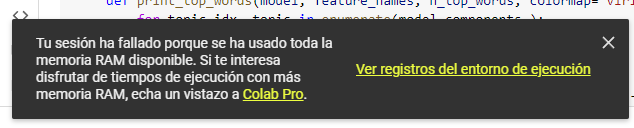

En la celda que está en la parte de arriba se puede observar que se está tomando el juego **'Dead by Daylight'** con la filtración de las reseñas negativas, esto principalmente para poder realizar en primera instancia su nube de palabras.

In [48]:
#Procederemos a realizar la nube de palabras, esto con el objetivo de poder observar las palabras más repetidas cpn respecto a las reseñas positivas y negativas

#Realizamos una función para poder 
def print_top_words(model, feature_names, n_top_words, colormap='viridis'):
    for topic_idx, topic in enumerate(model.components_):
        
        
        message = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        
      
        
        generate_wordcloud(message, colormap)
    print()    

#Función por defecto que generará la nube de puntos
def generate_wordcloud(text, colormap='viridis'):
    wordcloud = WordCloud(
                          relative_scaling = 1.0,
                          colormap = colormap
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [49]:
#
tfidf_vect = TfidfVectorizer(max_df=.50)

# Se extraen los tópicos de dataset
X_train_topical = tfidf_vect.fit_transform(X_train)

nmf = NMF(n_components=3, random_state=273, alpha=.1, l1_ratio=.5)

document_topics_nmf = nmf.fit_transform(X_train_topical)

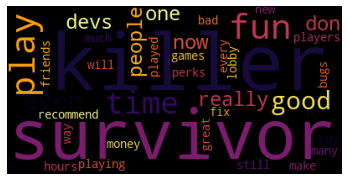

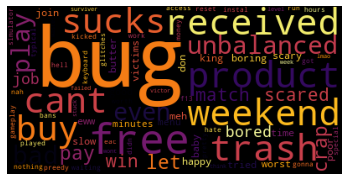

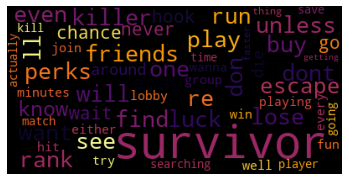

In [50]:
#Se obtiene el contenido y se muestra, en este caso, se realizó un wordcloud de las palabras negativas
tfidf_vect_feature_names = tfidf_vect.get_feature_names()
print_top_words(nmf, tfidf_vect_feature_names, 100, colormap='inferno')

In [51]:
#Para las reseñas positivas

clean_data = steam_data.dropna()

#Para las reseñas recomendadas
train = clean_data[(clean_data['title'] == 'Dead by Daylight') & (clean_data['recommendation_int'] == 1)]

X = train['review']
y = train['recommendation_int']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

Se realiza el mismo procedimiento que en las celdas ubicadas en la parte de arriba, con la única diferencia de que ahora se está filtrando por medio de las reseñas recomendadas.

In [53]:
#
tfidf_vect = TfidfVectorizer(max_df=.50)

# Se extraen los tópicos de dataset
X_train_topical = tfidf_vect.fit_transform(X_train)

nmf = NMF(n_components=3, random_state=273, alpha=.1, l1_ratio=.5)

document_topics_nmf = nmf.fit_transform(X_train_topical)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


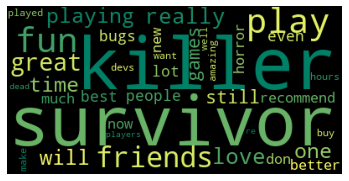

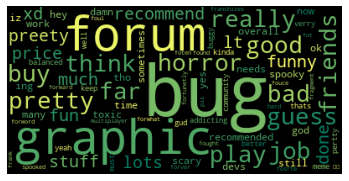

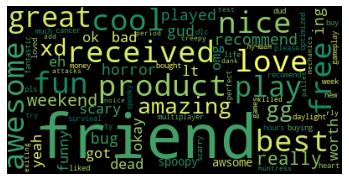

In [54]:
#Se obtiene el contenido y se muestra, en este caso, se realizó un wordcloud de las palabras negativas
tfidf_vect_feature_names = tfidf_vect.get_feature_names()
print_top_words(nmf, tfidf_vect_feature_names, 100, colormap='summer')

Para finalizar, se pudo observar que en la mayoría de los casos coinciden en las wordclouds filtradas con las palbras que le corresponden. Hay casos en los que los usuarios escriben reseñas negativas y recomiendan el juego, también sucede lo contrario.

Se encontró que existe una correlación entre estos dos factores, pero esto no significa que uno dependa directamente del otro.